### Building a perceptron-based linear regressor

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
#Define the number of points to generate
num_points = 1200

In [128]:
#Generate the data based on equation y = mx + c
data = []
m = 0.2
c = 0.5

for i in range(num_points):
    #Generate x
    x = np.random.normal(0.0, 0.8)
    
    #Generate some noise to add variation to the data
    noise = np.random.normal(0.0, 0.04)
    
    #Compute y
    y = m * x + c
    data.append([x, y])

In [129]:
#Separate x and y
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]

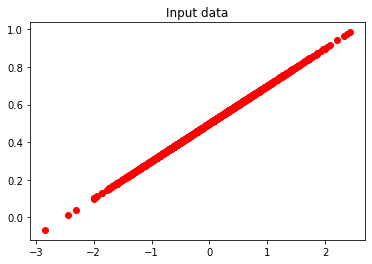

In [130]:
#Plot the generated data
plt.plot(x_data, y_data, 'ro')
plt.title('Input data');

In [131]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [132]:
#Generate weights and biases
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

#Define the equation for y
y = W * x_data + b

In [133]:
#Define how to compute the loss
loss = tf.reduce_mean(tf.square(y - y_data))

In [134]:
#Define the gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [135]:
#Initialize all the variables
init = tf.global_variables_initializer()

In [136]:
#Start the tensorflow session and run it
sess = tf.Session()
sess.run(init)


Iteration 1
W =  0.3029888
b =  0.5014076
loss =  0.00697587


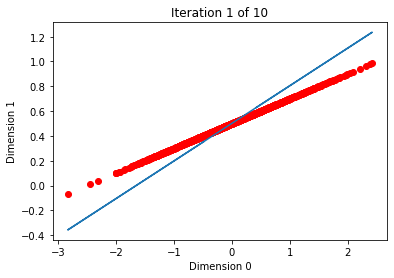


Iteration 2
W =  0.23526734
b =  0.5004715
loss =  0.0008180132


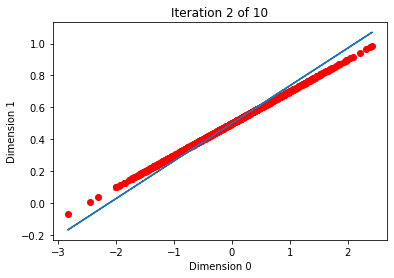


Iteration 3
W =  0.21207684
b =  0.50016147
loss =  9.592278e-05


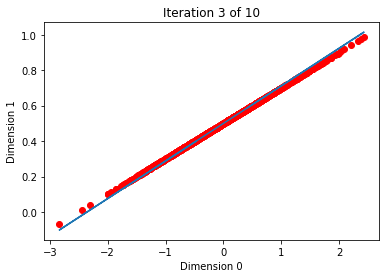


Iteration 4
W =  0.20413557
b =  0.5000553
loss =  1.1248255e-05


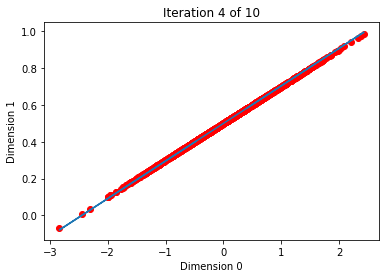


Iteration 5
W =  0.20141616
b =  0.50001895
loss =  1.3189938e-06


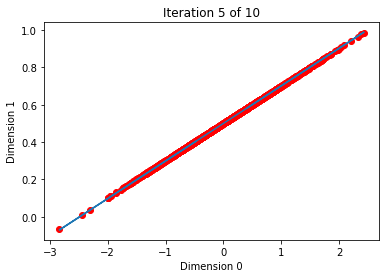


Iteration 6
W =  0.20048495
b =  0.5000065
loss =  1.5466843e-07


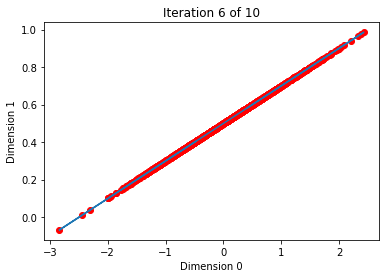


Iteration 7
W =  0.20016606
b =  0.5000022
loss =  1.813643e-08


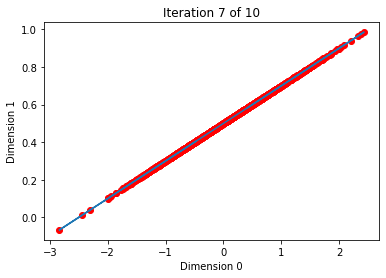


Iteration 8
W =  0.20005687
b =  0.5000008
loss =  2.1267024e-09


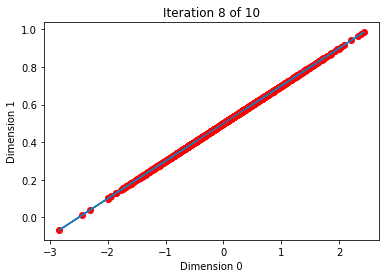


Iteration 9
W =  0.20001948
b =  0.50000024
loss =  2.4955127e-10


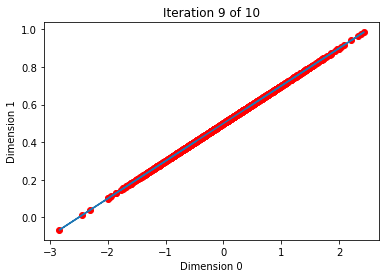


Iteration 10
W =  0.20000666
b =  0.5000001
loss =  2.9203685e-11


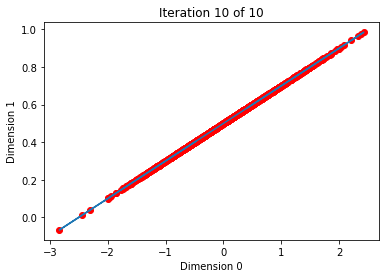

In [137]:
#Start the training process
num_iterations = 10
for step in range(1, num_iterations + 1):
    #Run the session
    sess.run(train)
    
    #Print the progress
    print(f'\nIteration {step}')
    print('W = ', sess.run(W)[0])
    print('b = ', sess.run(b)[0])
    print('loss = ', sess.run(loss))
    
    #Plot the input data and overlay the predicted model on top(which is a line)
    plt.plot(x_data, y_data, 'ro')
    
    predicted_y = sess.run(W) * x_data + sess.run(b)
    plt.plot(x_data, predicted_y)
    
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    plt.title(f'Iteration {step} of {num_iterations}')
    
    plt.show()

### Building an image classifier using a single-layer neural network

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [14]:
#Get the mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
#The images are 28x28, so we create an input layer with 784 neurons (28 x 28 = 784)
x = tf.placeholder(tf.float32, [None, 784])

In [15]:
#Reshape the x_train to x_train.size by 784 and x_test to x_test.size by 784
x_train = np.resize(x_train, (60000, 784))
x_test = np.resize(x_test, (10000, 784))

In [7]:
#Let's perform one-hot encoding on the labels since we have 10 distinct numbers
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train = [[y] for y in y_train]
y_train = encoder.fit_transform(y_train).toarray()

y_test = [[y] for y in y_test]
y_test = encoder.transform(y_test).toarray()

In [8]:
#Create a layer with weights and biases. There are 10 distinct numbers, so we have input layer of 784 neurons and 10 classes 
                                                                                                         #in the output layer
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [9]:
#Create the equation for y using y = W * x + b
y = tf.matmul(x, W) + b

In [10]:
#Define the entropy loss and the gradient descent optimizer
y_loss = tf.placeholder(tf.float32, [None, 10])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_loss))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [11]:
#Initialize all the variables
init = tf.global_variables_initializer()

In [12]:
#Create a session
session = tf.Session()
session.run(init)

In [13]:
#Start training
num_iterations = 1200
batch_size = 90

#This is to take note of how the batches are calculated
current_batch_start = 0
current_batch_end = batch_size

for _ in range(num_iterations):
    #Get the next batch of images
    x_train_batch, y_train_batch = x_train[current_batch_start:current_batch_end], \
                                    y_train[current_batch_start:current_batch_end]
    
    #Train on this batch of images
    session.run(optimizer, feed_dict = {x: x_train_batch, y_loss: y_train_batch})
    
    #Change the batch positions to the next positions
    current_batch_start += batch_size
    current_batch_end += batch_size
    
#Compute the accuracy using test data
predicted = tf.equal(tf.argmax(y, 1), tf.argmax(y_loss, 1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

print('Accuracy = ', session.run(accuracy, feed_dict = {x: x_test, y_loss: y_test}))

Accuracy =  0.8735


### Building an image classifier using a Convolutional Neural Network

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#Get the mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
#Function to create values for weights in each layer
def get_weights(shape):
    data = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(data)

def get_biases(shape):
    data = tf.constant(0.1, shape = shape)
    return tf.Variable(data)

def create_layer(shape):
    #Get the weights and biases
    W = get_weights(shape)
    b = get_biases([shape[-1]])
    
    return W, b

def convolution_2d(x, W):
    """Function to perform 2D convolution"""
    return tf.nn.conv2d(x, W, strides = [1, 1, 1, 1], padding = 'SAME')

def max_pooling(x):
    return tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

In [5]:
#The images are 28x28, so we create the input layer with 784 neurons(28x28 = 784)
x = tf.placeholder(tf.float32, [None, 784])

#Reshape x into a 4D tensor
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
#Lets reshape the input images to size x 784
x_train = np.resize(x_train, (60000, 784))
x_test = np.resize(x_test, (10000, 784))

In [8]:
#Define the first convolutional layer
W_conv1, b_conv1 = create_layer([5, 5, 1, 32])

#Convolve the image with the weight tensor, add the bias, and then apply the ReLU function
h_conv1 = tf.nn.relu(convolution_2d(x_image, W_conv1) + b_conv1)

#Apply the max pooling operator
h_pool1 = max_pooling(h_conv1)

In [9]:
#Define the second convolutional layer
W_conv2, b_conv2 = create_layer([5, 5, 32, 64])

#Convolve the output of the previous layer with the weight tensor, add the bias and then apply the ReLU function
h_conv2 = tf.nn.relu(convolution_2d(h_pool1, W_conv2) + b_conv2)

#Apply the 2x2 max pooling operator to the output of the previous step
h_pool2 = max_pooling(h_conv2)

In [10]:
#Define the fully connected layer
W_fcl, b_fcl = create_layer([7 * 7 * 64, 1024])

#Reshape the output of the previous layer
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])

#Multiply the output of previous layer by the weight tensor, add the bias, and then apply the ReLU function
h_fcl = tf.nn.relu(tf.matmul(h_pool2_flat, W_fcl) + b_fcl)

In [11]:
#To reduce overfitting, Define the dropout layer using a probability placeholder for all the neurons
keep_prob = tf.placeholder(tf.float32)
h_fcl_drop = tf.nn.dropout(h_fcl, keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
#Define the readout layer (output layer) consisting of 10 neurons -> 10 distinct numbers (classes) in the dataset
W_fcl2, b_fcl2 = create_layer([1024, 10])

y_conv = tf.matmul(h_fcl_drop, W_fcl2) + b_fcl2

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
#Let's one-hot encode the y label data, so we have 10 distinct classes per label
encoder = OneHotEncoder()
y_train = [[y] for y in y_train]
y_train = encoder.fit_transform(y_train).toarray()

y_test = [[y] for y in y_test]
y_test = encoder.transform(y_test).toarray()

In [15]:
#Define the entropy loss and the optimizer
y_loss = tf.placeholder(tf.float32, [None, 10])

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_conv, labels = y_loss))
optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [16]:
#Define the accuracy computation
predicted = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_loss, 1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

In [17]:
#Create and run a session
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

In [18]:
#This is to reduce the number of datasets for testing because of the lack of powerful resources on my PC
x_test = x_test[:1000]
y_test = y_test[:1000]

In [19]:
#Start the training process
num_iterations = 1000
batch_size = 75

#This is to take note of how the batches are calculated
batch_start = 0
batch_end = batch_size

print('Training the model: ')
for i in range(num_iterations):
    x_train_batch, y_train_batch = x_train[batch_start: batch_end], y_train[batch_start: batch_end]
    
    #Print progress every 50 iterations
    if i % 50 == 0:
        cur_accuracy = accuracy.eval(feed_dict = {x: x_train_batch, y_loss: y_train_batch, keep_prob: 1.0})
        print(f'Iteration {i}, Accuracy = {cur_accuracy}')
    
    #Train on the current batch
    optimizer.run(feed_dict = {x: x_train_batch, y_loss: y_train_batch, keep_prob: 0.5})
    
#Once training is over, compute accuracy using test data
print('\nTest accuracy = ', accuracy.eval(feed_dict = {x: x_test, y_loss: y_test, keep_prob: 1.0}))

Training the model: 
Iteration 0, Accuracy = 0.13333334028720856
Iteration 50, Accuracy = 0.9866666793823242
Iteration 100, Accuracy = 1.0
Iteration 150, Accuracy = 1.0
Iteration 200, Accuracy = 1.0
Iteration 250, Accuracy = 1.0
Iteration 300, Accuracy = 1.0
Iteration 350, Accuracy = 1.0
Iteration 400, Accuracy = 1.0
Iteration 450, Accuracy = 1.0
Iteration 500, Accuracy = 1.0
Iteration 550, Accuracy = 1.0
Iteration 600, Accuracy = 1.0
Iteration 650, Accuracy = 1.0
Iteration 700, Accuracy = 1.0
Iteration 750, Accuracy = 1.0
Iteration 800, Accuracy = 1.0
Iteration 850, Accuracy = 1.0
Iteration 900, Accuracy = 1.0
Iteration 950, Accuracy = 1.0

Test accuracy =  0.675
